# Introdução

- A Otimização é uma das áreas de Matemática Aplicada cujo foco de interesse reside na minimização ou maximização de uma função restrita ou não a um subconjunto do seu domínio.
- O interesse pode ser do ponto de vista teórico, computacional ou de aplicação.
- De uma maneira geral, cai em
\begin{align}
\min & \quad f(x) \\
\text{sujeito a} & \quad x \in \Omega
\end{align}
com $f:D\subset \mathbb{R}^n \to \mathbb{R}$ com $\Omega \subset \mathbb{R}^n$.
- $f$ é a função objetivo e $\Omega$ é o conjunto factível ou viável.

# Classificação das restrições

- Irrestrito: $\Omega = \mathbb{R}^n$;
- Conjunto factível poliedral: $\Omega = \{x : b_{\ell} \leq Ax \leq b_u\}$
    - Caixa: $\Omega = \{x : \ell \leq x \leq u\}$;
    - Igualdade: $\Omega = \{x : Ax = b\}$;
- Restrições gerais
    - Igualdades: $\Omega = \{x : h(x) = 0\}$;
    - Desigualdades: $\Omega = \{x : g(x) \leq 0\}$.

In [17]:
using Plots, ForwardDiff, Interact
plotly(size=(600,400))

Plots.PlotlyBackend()

# Condições de Otimalidade

## Problema irrestrito

- $\nabla f(x^*) = 0$
- $\nabla^2 f(x^*)$ é definida positiva $(y^T\nabla^2 f(x^*) y > 0$, ou todos os autovalores são positivos).

In [18]:
f(x) = (1 + x^2)^2 - 2x
@manipulate for a in linspace(-2, 2, 21)
    m = ForwardDiff.derivative(f, a)
    plot(f, -3, 3, leg=false)
    scatter!([a], [f(a)], c=:red, ms=3)
    plot!(x -> f(a) + m * (x - a), -3, 3, c=:red)
    xlims!(-3, 3)
    ylims!(-20, 80)
end

Interact.Options{:SelectionSlider,Float64}(43: "input-13" = 0.0 Float64 , "a", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.8"=>-1.8,"-1.6"=>-1.6,"-1.4"=>-1.4,"-1.2"=>-1.2,"-1.0"=>-1.0,"-0.8"=>-0.8,"-0.6"=>-0.6,"-0.4"=>-0.4,"-0.2"=>-0.2…), Dict(1.0=>"1.0",1.2=>"1.2",2.0=>"2.0",-0.2=>"-0.2",-1.0=>"-1.0",-0.6=>"-0.6",-1.6=>"-1.6",1.4=>"1.4",0.0=>"0.0",-1.2=>"-1.2"…)), Any[], Any[], true, "horizontal", true)

In [19]:
f(x, y) = (x - 1)^2 + 4 * (y - 2)^2
X, Y = linspace(0, 3, 100), linspace(0, 3, 100)
surface(X, Y, f, leg=false)

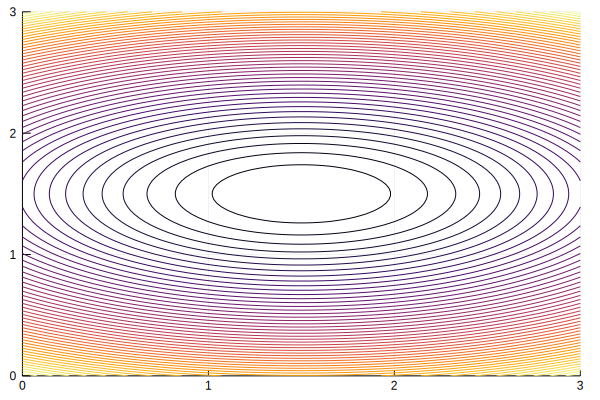

In [22]:
gr(size=(600,400))
f(x, y) = (x - 1.5)^2 + 4 * (y - 1.5)^2
X, Y = linspace(0, 3, 100), linspace(0, 3, 100)
contour(X, Y, f, leg=false, levels=50)

Interact.Options{:SelectionSlider,Float64}(47: "input-14" = 1.4848484848484849 Float64 , "ax", 1.4848484848484849, "1.4848484848484849", 50, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.030303030303030304"=>0.030303,"0.06060606060606061"=>0.0606061,"0.09090909090909091"=>0.0909091,"0.12121212121212122"=>0.121212,"0.15151515151515152"=>0.151515,"0.18181818181818182"=>0.181818,"0.21212121212121213"=>0.212121,"0.24242424242424243"=>0.242424,"0.2727272727272727"=>0.272727…), Dict(0.333333=>"0.3333333333333333",2.0=>"2.0",0.484848=>"0.48484848484848486",1.87879=>"1.878787878787879",1.15152=>"1.1515151515151516",1.60606=>"1.606060606060606",1.57576=>"1.5757575757575757",2.30303=>"2.303030303030303",0.606061=>"0.6060606060606061",0.030303=>"0.030303030303030304"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(49: "input-15" = 1.4848484848484849 Float64 , "ay", 1.4848484848484849, "1.4848484848484849", 50, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.030303030303030304"=>0.030303,"0.06060606060606061"=>0.0606061,"0.09090909090909091"=>0.0909091,"0.12121212121212122"=>0.121212,"0.15151515151515152"=>0.151515,"0.18181818181818182"=>0.181818,"0.21212121212121213"=>0.212121,"0.24242424242424243"=>0.242424,"0.2727272727272727"=>0.272727…), Dict(0.333333=>"0.3333333333333333",2.0=>"2.0",0.484848=>"0.48484848484848486",1.87879=>"1.878787878787879",1.15152=>"1.1515151515151516",1.60606=>"1.606060606060606",1.57576=>"1.5757575757575757",2.30303=>"2.303030303030303",0.606061=>"0.6060606060606061",0.030303=>"0.030303030303030304"…)), Any[], Any[], true, "horizontal", true)

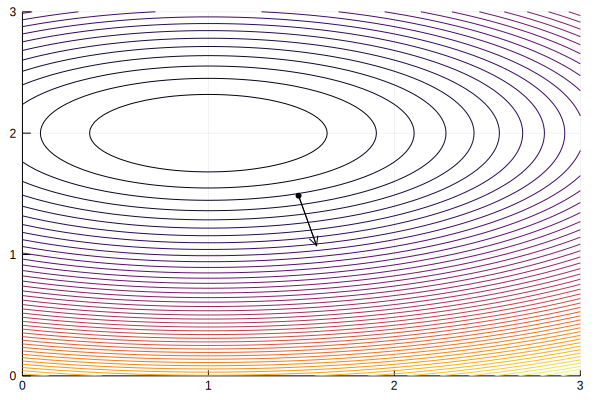

In [23]:
f(x, y) = 0.1 * ( (x - 1)^2 + 4 * (y - 2)^2 )
X, Y = linspace(0, 3, 100), linspace(0, 3, 100)

@manipulate for ax = X, ay = Y
    contour(X, Y, f, leg=false, levels=50)
    a = [ax; ay]
    ∇f = ForwardDiff.gradient(x -> f(x[1],x[2]), a)
    scatter!([a[1]], [a[2]], c=:black, ms=3)
    plot!(a[1] + [0, ∇f[1]], a[2] + [0, ∇f[2]], c=:black, l=:arrow)
    xlims!(X[1], X[end])
    ylims!(Y[1], Y[end])
end

## A segunda derivada

$$ f(x + d) = f(x) + \nabla f(x)^T d + \frac{1}{2} d^T\nabla^2 f(x) d + E(d), $$
com
$\frac{E(d)}{\Vert d\Vert^2} \to 0$.

- Se $x^*$ é um ponto crítico ($\nabla f(x^*) = 0$), próximo da solução a função $f$ é aproximada por
$f(x^*) + \frac{1}{2} d^T \nabla^2 f(x^*) d$;
- Para saber se $x^*$ é um minimizador, devemos analisar se em alguma direção $f(x^* + d)$ diminui para $d$ arbitrariamente pequeno;
- Isso equivale a $\nabla^2 f(x^*)$ ter algum autovalor negativo;
- Em resumo, os autovalores da Hessiana classificam (se possível) o tipo de ponto crítico.

Interact.Options{:ToggleButtons,Float64}(53: "input-16" = 1.0 Float64 , "α", 1.0, "1.0", 1, Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"0.0"=>0.0,"-1.0"=>-1.0), Dict(0.0=>"0.0",-1.0=>"-1.0",1.0=>"1.0")), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Float64}(55: "input-17" = 1.0 Float64 , "β", 1.0, "1.0", 1, Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"0.0"=>0.0,"-1.0"=>-1.0), Dict(0.0=>"0.0",-1.0=>"-1.0",1.0=>"1.0")), Any[], Any[], true, "horizontal", true)

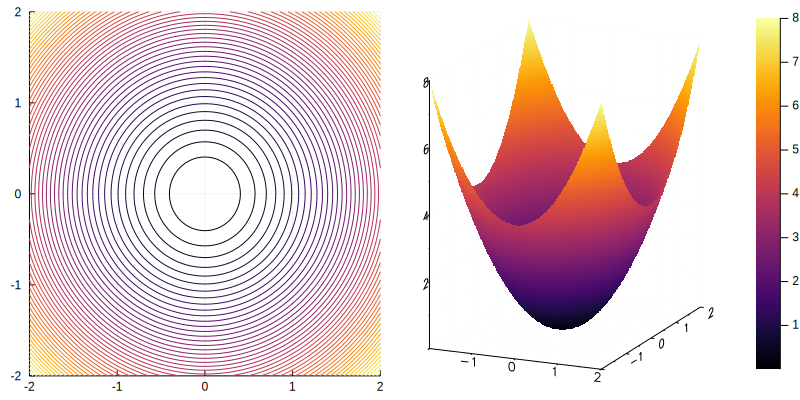

In [24]:
gr(size=(800,400))
@manipulate for α = [1.0; 0.0; -1.0], β = [1.0; 0.0; -1.0]
    f(x,y) = α * x^2 + β * y^2
    lay = @layout [a b]
    D = linspace(-2, 2, 100)
    p = contour(D, D, f, levels=50, leg=false, layout=lay)
    surface!(p[2], D, D, f)
end

- Se todos os autovalores são positivos, o ponto é minimizador;
- Se todos os autovalores são negativos, o ponto é maximizador;
- Se existem autovalores positivos e negativos, o ponto é de sela;
- Se existem autovalores nulos, e os outros são de mesmo sinal, nada se pode afirmar.

## Problemas com restrições de igualdade

$$ \min \ f(x) \qquad \text{suj. a}\qquad h(x) = 0. $$

$$\nabla f(x) + \sum_{i = 1}^m \lambda_i^* \nabla h_i(x^*) = 0.$$

In [25]:
gr(size=(600,400))

Plots.GRBackend()

Interact.Options{:SelectionSlider,Float64}(59: "input-18" = 1.0888888888888888 Float64 , "param", 1.0888888888888888, "1.0888888888888888", 50, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.022222222222222223"=>0.0222222,"0.044444444444444446"=>0.0444444,"0.06666666666666667"=>0.0666667,"0.08888888888888889"=>0.0888889,"0.1111111111111111"=>0.111111,"0.13333333333333333"=>0.133333,"0.15555555555555556"=>0.155556,"0.17777777777777778"=>0.177778,"0.2"=>0.2…), Dict(0.333333=>"0.3333333333333333",0.822222=>"0.8222222222222222",1.2=>"1.2",1.88889=>"1.8888888888888888",2.04444=>"2.0444444444444443",2.0=>"2.0",1.15556=>"1.1555555555555554",2.15556=>"2.1555555555555554",0.377778=>"0.37777777777777777",1.4=>"1.4"…)), Any[], Any[], true, "horizontal", true)

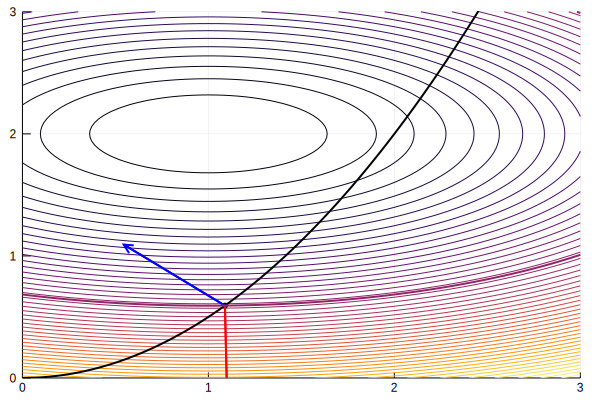

In [26]:
f(x, y) = 0.1 * ( (x - 1)^2 + 4 * (y - 2)^2 )
X, Y = linspace(0, 3, 100), linspace(0, 3, 100)
t = linspace(0, 3, 100)

@manipulate for param = linspace(0, 2.2, 100)
    contour(X, Y, f, leg=false, levels=50)

    plot!(t, t.^2 / 2, lw=2, c=:black) # y = x^2 / 2

    a = [param; param^2 / 2]
    ∇f = ForwardDiff.gradient(x -> f(x[1],x[2]), a)
    ∇c = [-param; 1] / 2

    scatter!([a[1]], [a[2]], c=:black, ms=3)
    plot!(a[1] + [0, ∇f[1]], a[2] + [0, ∇f[2]], c=:red, l=:arrow, lw=2)
    plot!(a[1] + [0, ∇c[1]], a[2] + [0, ∇c[2]], c=:blue, l=:arrow, lw=2)
    contour!(X, Y, f, levels=[f(a[1], a[2])], lw=2)

    xlims!(X[1], X[end])
    ylims!(Y[1], Y[end])
end

# Convexidade

Def.: $\Omega$ é convexo se $\forall x, y \in \Omega$, $\alpha x + (1 - \alpha) y \in \Omega, \forall \alpha \in [0,1]$.

Ou, $\Omega$ é convexo se dados dois pontos em $\Omega$, o segmento ligando os dois também está em $\Omega$.

Def.: $f:\Omega \to \mathbb{R}$ é convexa em $\Omega$ convexo se
$\forall x, y \in \Omega$, temos

$$
f(\lambda x + (1 - \lambda) y) \leq \lambda f(x) + (1 - \lambda) f(y)
$$

Interact.Options{:SelectionSlider,Float64}(63: "input-19" = -0.1 Float64 , "a", -0.1, "-0.1", 26, Interact.OptionDict(DataStructures.OrderedDict("-0.7"=>-0.7,"-0.676"=>-0.676,"-0.652"=>-0.652,"-0.628"=>-0.628,"-0.604"=>-0.604,"-0.58"=>-0.58,"-0.556"=>-0.556,"-0.532"=>-0.532,"-0.508"=>-0.508,"-0.484"=>-0.484…), Dict(-0.316=>"-0.316",-0.22=>"-0.22",-0.436=>"-0.436",0.38=>"0.38",-0.652=>"-0.652",-0.556=>"-0.556",-0.196=>"-0.196",0.452=>"0.452",-0.508=>"-0.508",0.404=>"0.404"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(65: "input-20" = 1.1 Float64 , "b", 1.1, "1.1", 26, Interact.OptionDict(DataStructures.OrderedDict("0.5"=>0.5,"0.524"=>0.524,"0.548"=>0.548,"0.572"=>0.572,"0.596"=>0.596,"0.62"=>0.62,"0.644"=>0.644,"0.668"=>0.668,"0.692"=>0.692,"0.716"=>0.716…), Dict(0.908=>"0.908",1.46=>"1.46",1.268=>"1.268",0.86=>"0.86",1.484=>"1.484",1.532=>"1.532",1.364=>"1.364",1.052=>"1.052",1.508=>"1.508",1.148=>"1.148"…)), Any[], Any[], true, "horizontal", true)

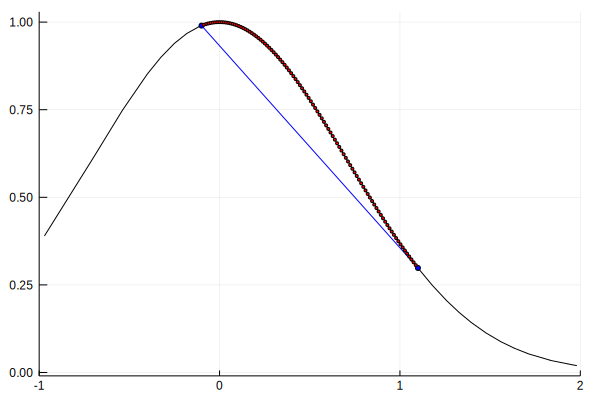

In [27]:
f(x) = exp(-x^2)
x, y = -1.0, 2.0
δ = (y - x) / 10
@manipulate for a in linspace(x + δ, (x + y) / 2, 51),
                b in linspace((x + y) / 2, y - δ, 51)
    plot(f, x, y, c=:black, leg=false)
    scatter!([a, b], [f(a), f(b)], c=:blue, ms=3)
    plot!([a, b], [f(a), f(b)], c=:blue)
    for t = linspace(0, 1, 100)
        z = t * a + (1 - t) * b
        if f(z) > t * f(a) + (1 - t) * f(b)
            scatter!([z], [f(z)], c=:red, ms=2)
        end
    end
    xlims!(x, y)
end

## Convexidade é importante para minimização

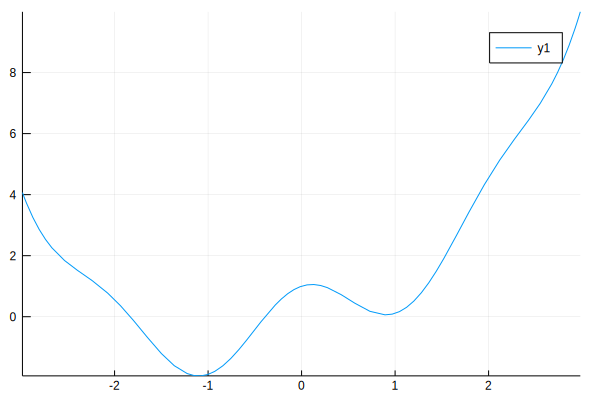

In [10]:
f(x) = cos(3x) + x + 0.1x^4
plot(f, -3, 3)

## Método de Newton para zeros de funções

Buscamos $x$ tal que $f(x) = 0$.
- Dado $x_0$, $k = 0$
- Enquanto $f(x_k) \neq 0$
  - Aproxime $f(x_k + h) \approx L(h) = f(x_k) + hf'(x_k)$
  - Ache $h_k$ tal que $L(h_k) = 0$ ($h_k = -f(x_k) / f'(x_k)$)
  - Atualize $x_{k+1} = x_k + h_k$
  - Incremente $k$

Interact.Slider{Int64}(69: "input-21" = -1 Int64 , "", -1, -1:2, "horizontal", true, "d", true)

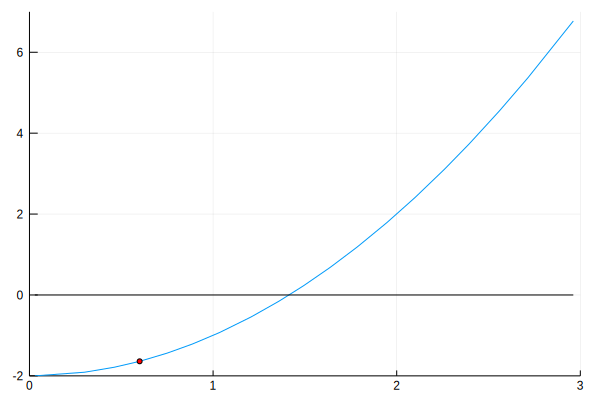

In [28]:
f(x) =  x^2 - 2
ℓ, u = 0.0, 3.0
derivf(x) = ForwardDiff.derivative(f, x)
@manipulate for n = slider(-1:2, value=-1)
    plot(f, ℓ, u, leg=false)
    plot!(x->0, ℓ, u, c=:black)
    a = 0.6
    for k = 1:n
        a = a - f(a) / derivf(a)
    end
    scatter!([a], [f(a)], ms=3, c=:red)
    if n >= 0
        plot!(x -> f(a) + derivf(a) * (x - a), ℓ, u, c=:red)
        a = a - f(a) / derivf(a)
        scatter!([a], [0.0], ms=3, c=:red)
        plot!([a, a], [0.0, f(a)], c=:red, l=:dash)
    end
    xlims!(ℓ, u)
    ylims!(extrema(f.(linspace(ℓ, u, 100)))...)
end

## Método de Newton para minimização

Buscamos $x$ que minimize $f(x)$. Então $f'(x) = 0$
- Dado $x_0$, $k = 0$
- Enquanto $f(x_k) \neq 0$
  - Aproxime $f(x_k + h) \approx Q(h) = f(x_k) + hf'(x_k) +
    \frac{h^2}{2}f''(x_k)$
  - Ache $h_k$ que minimize $Q(h)$ ($h_k = -f'(x_k) / f''(x_k)$)
  - Atualize $x_{k+1} = x_k + h_k$
  - Incremente $k$

Interact.Slider{Int64}(73: "input-22" = -1 Int64 , "", -1, -1:2, "horizontal", true, "d", true)

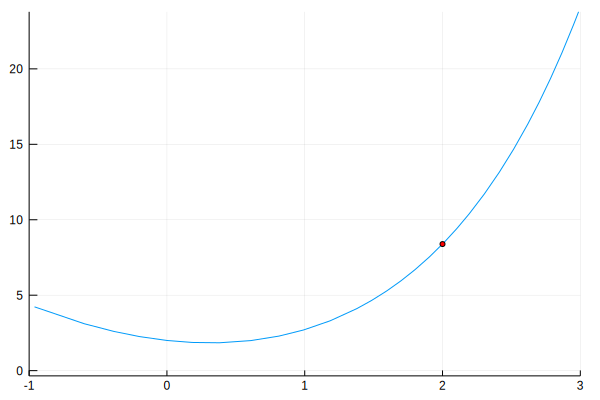

In [29]:
f(x) = exp(x) + (x - 1)^2
ℓ, u = -1.0, 3.0
derivf(x) = ForwardDiff.derivative(f, x)
deriv2f(x) = ForwardDiff.derivative(derivf, x)
@manipulate for n = slider(-1:2, value=-1)
    plot(f, ℓ, u, leg=false)
    ylim = [ylims()...]
    ylim[1] -= (ylim[2] - ylim[1]) / 10
    a = 2.0
    for k = 1:n
        a = a - derivf(a) / deriv2f(a)
    end
    scatter!([a], [f(a)], ms=3, c=:red)
    if n >= 0
        q(x) = f(a) + derivf(a) * (x - a) +
            deriv2f(a) * (x - a)^2 / 2
        plot!(q, ℓ, u, c=:red)
        b = a - derivf(a) / deriv2f(a)
        scatter!([b], [q(b)], ms=3, c=:red)
        plot!([b, b], [q(b), f(b)], c=:red, l=:dash)
    end
    xlims!(ℓ, u)
    ylims!(ylim...)
end

## Convexidade é importante

Interact.Slider{Int64}(93: "input-27" = -1 Int64 , "", -1, -1:4, "horizontal", true, "d", true)

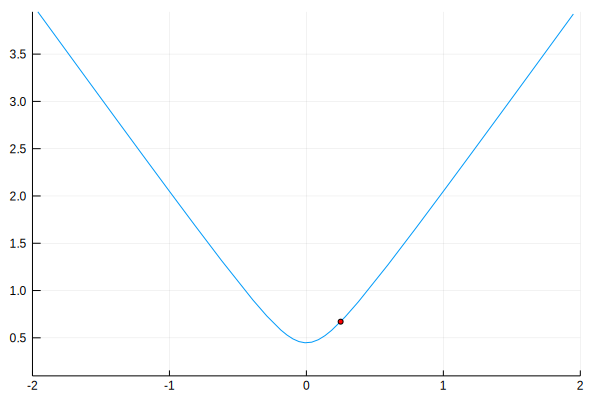

In [34]:
f(x) = 0.5x^4 - x^2 + 0.2x; x0 = 1.7
f(x) = sqrt(0.2 + 4x^2); x0 = 0.25
#f(x) = x^2 + exp(-4*(x-0.1)^2); x0 = 1.5
#f(x) = x^4 / 4 - x^2 / 2; x0 = sqrt(5) / 5
ℓ, u = -2.0, 2.0
derivf(x) = ForwardDiff.derivative(f, x)
deriv2f(x) = ForwardDiff.derivative(derivf, x)
@manipulate for n = slider(-1:4, value=-1)
    plot(f, ℓ, u, leg=false)
    ylim = [ylims()...]
    ylim[1] -= (ylim[2] - ylim[1]) / 10
    a = x0
    for k = 1:n
        a = a - derivf(a) / deriv2f(a)
    end
    scatter!([a], [f(a)], ms=3, c=:red)
    if n >= 0
        q(x) = f(a) + derivf(a) * (x - a) +
            deriv2f(a) * (x - a)^2 / 2
        plot!(q, ℓ, u, c=:red)
        b = a - derivf(a) / deriv2f(a)
        scatter!([b], [q(b)], ms=3, c=:red)
        plot!([b, b], [q(b), f(b)], c=:red, l=:dash)
    end
    xlims!(ℓ, u)
    ylims!(ylim...)
end

**Em resumo, convexidade é importante.**

# Programação Linear

$$ \min c^Tx \qquad \text{suj. a} \qquad Ax = b, \quad x \geq 0. $$

- Podemos considerar algumas variáveis inteiras, e em geral o problema muda drasticamente, mas é muito mais real.

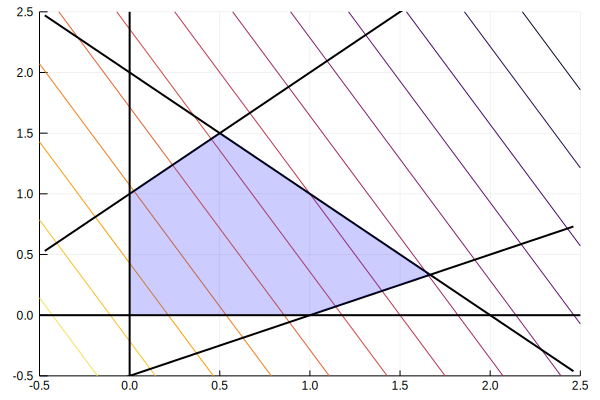

In [35]:
c = -[2.0; 1.0]
A = [-1 -1; 1 -1; -1 2]
b = [-2; -1; -1]
contour(linspace(-0.5, 2.5, 100), linspace(-0.5, 2.5, 100),
        (x,y) -> c[1] * x + c[2] * y, leg=false)
for i = 1:3
    plot!(x -> (b[i] - A[i,1] * x) / A[i,2], -0.5, 2.5, c=:black, lw=2)
end
t = linspace(0, 1.66, 100)
upper = minimum( (b[1:2] .- A[1:2,1] * t') ./ A[1:2,2], 1)[:]
lower = max.(0, (b[3] - A[3,1] * t) / A[3,2])
plot!(t, upper, alpha=0,
        fillcolor=:blue, fillalpha=0.2, fill_between=[lower upper])
plot!([-0.5, 2.5], [0.0, 0.0], lw=2, c=:black)
plot!([0.0, 0.0], [-0.5, 2.5], lw=2, c=:black)
xlims!(-0.5, 2.5)
ylims!(-0.5, 2.5)

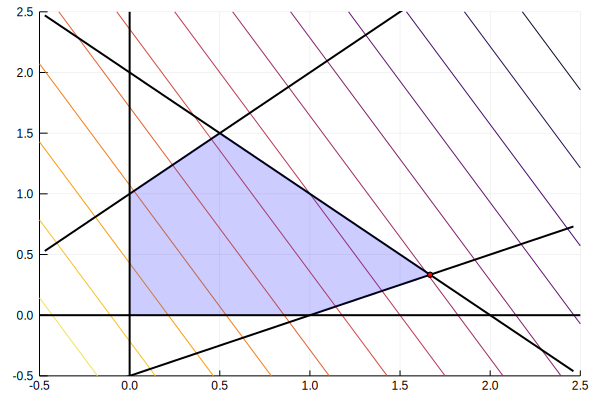

In [37]:
using JuMP # Mathematical Modelling Language
using Cbc  # One solver, open source, easy to install

model = Model(solver = CbcSolver())
@variable(model, x[1:2] >= 0)
@objective(model, Min, sum(x[i] * c[i] for i = 1:2))
@constraint(model, [i=1:3], sum(A[i,j] * x[j] for j = 1:2) >= b[i])
solve(model)

x_jump = getvalue(x)
scatter!([x_jump[1]], [x_jump[2]], ms=3, c=:red)

Interact.Options{:SelectionSlider,Float64}(97: "input-28" = 3.1328416991229693 Float64 , "θ", 3.1328416991229693, "3.1328416991229693", 180, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01750190893364787"=>0.0175019,"0.03500381786729574"=>0.0350038,"0.05250572680094362"=>0.0525057,"0.07000763573459148"=>0.0700076,"0.08750954466823936"=>0.0875095,"0.10501145360188724"=>0.105011,"0.1225133625355351"=>0.122513,"0.14001527146918297"=>0.140015,"0.15751718040283086"=>0.157517…), Dict(5.32058=>"5.320580315828953",2.99283=>"2.992826427653786",6.03816=>"6.038158582108516",1.73269=>"1.7326889844311393",4.00794=>"4.0079371458053625",3.58789=>"3.587891331397814",4.02544=>"4.025439054739011",6.26568=>"6.265683398245939",1.36515=>"1.365148896824534",2.80031=>"2.8003054293836596"…)), Any[], Any[], true, "horizontal", true)

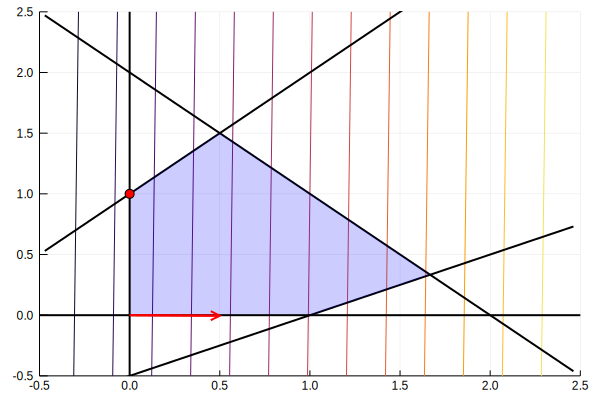

In [38]:
using JuMP # Mathematical Modelling Language
using Cbc  # One solver, open source, easy to install

@manipulate for θ = linspace(0, 2π, 360)
    c = -[cos(θ); sin(θ)]
    A = [-1 -1; 1 -1; -1 2]
    b = [-2; -1; -1]
    contour(linspace(-0.5, 2.5, 100), linspace(-0.5, 2.5, 100),
            (x,y) -> c[1] * x + c[2] * y, leg=false)
    
    for i = 1:3
        plot!(x -> (b[i] - A[i,1] * x) / A[i,2], -0.5, 2.5, c=:black, lw=2)
    end
    t = linspace(0, 1.66, 100)
    upper = minimum( (b[1:2] .- A[1:2,1] * t') ./ A[1:2,2], 1)[:]
    lower = max.(0, (b[3] - A[3,1] * t) / A[3,2])
    plot!(t, upper, alpha=0,
            fillcolor=:blue, fillalpha=0.2, fill_between=[lower upper])
    plot!([-0.5, 2.5], [0.0, 0.0], lw=2, c=:black)
    plot!([0.0, 0.0], [-0.5, 2.5], lw=2, c=:black)
    xlims!(-0.5, 2.5)
    ylims!(-0.5, 2.5)

    model = Model(solver = CbcSolver())
    @variable(model, x[1:2] >= 0)
    @objective(model, Min, sum(x[i] * c[i] for i = 1:2))
    @constraint(model, [i=1:3], sum(A[i,j] * x[j] for j = 1:2) >= b[i])
    solve(model)

    x_jump = getvalue(x)
    plot!([0, c[1]/2], [0, c[2]/2], c=:red, l=:arrow, lw=2)
    scatter!([x_jump[1]], [x_jump[2]], ms=5, c=:red)
end